In [51]:
import pandas as pd
import numpy as np

In [52]:
class_1 = [
    (3.764, 2.4),
    (2.979, 4.241),
    (3.868, 1.023),
    (2.95, 1.849),
    (1.897, 2.411),
    (2.144, 3.454),
    (2.761, 2.122),
    (2.444, 2.334),
    (3.494, 1.795),
    (2.313, 1.146)
]

class_2 = [
    (5.447, 2.654),
    (8.864, 1.258),
    (10.27, 0.546),
    (8.046, 1.813),
    (9.533, 3.469),
    (8.155, 2.378),
    (7.112, 0.019),
    (7.652, 2.156),
    (9.23, 3.202),
    (7.613, 1.698)
]

class_3 = [
    (3.951, 6.58),
    (3.294, 9.951),
    (4.49, 7.562),
    (3.747, 8.777),
    (3.386, 7.787),
    (4.105, 8.387),
    (4.489, 6.819),
    (4.972, 8.428),
    (5.067, 8.302),
    (4.366, 7.637)
]

class_1 = np.array(class_1)
class_2 = np.array(class_2)
class_3 = np.array(class_3)

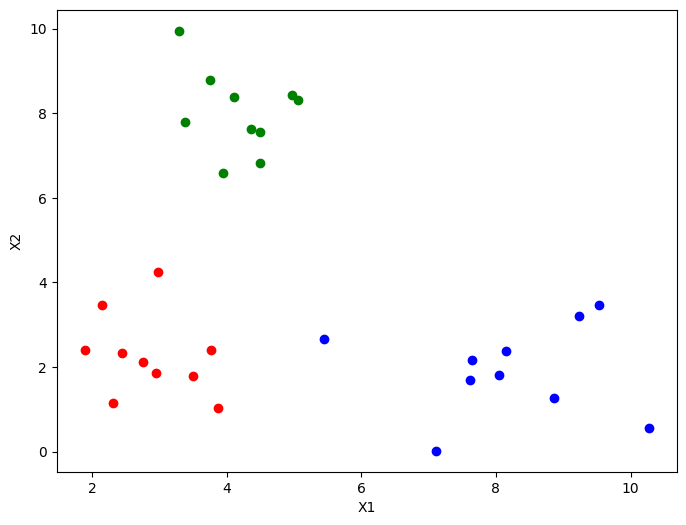

In [53]:
# Plot df

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2')
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('linearly_separable_dataset.png')
plt.show()

One-Against-All

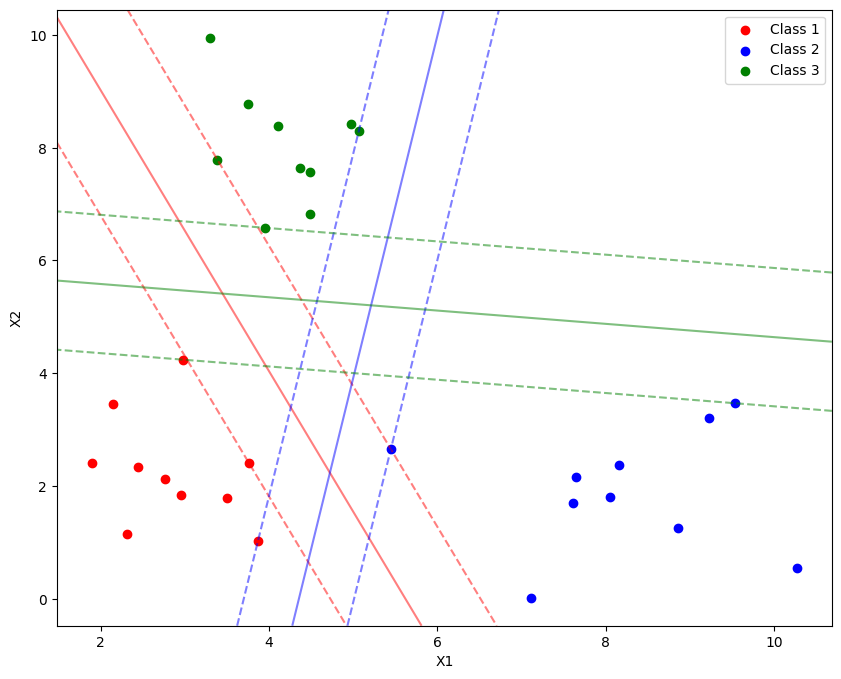

In [54]:
from sklearn.svm import SVC, NuSVC

# Prepare the data for one-against-all classification
X = np.vstack((class_1, class_2, class_3))
y = np.array([1]*len(class_1) + [2]*len(class_2) + [3]*len(class_3))

# # Train the SVMs
svm1 = SVC(kernel='linear', C=1E10)
svm1.fit(X, y==1)

svm2 = SVC(kernel='linear', C=1E10)
svm2.fit(X, y==2)

svm3 = SVC(kernel='linear', C=1E10)
svm3.fit(X, y==3)

# Plot the dataset
plt.figure(figsize=(10, 8))

# Plot the samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2')
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3')

# Function to plot the hyperplanes
def plot_hyperplane(svm, color):
    # Decision function is plotted first
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    # Grid for evaluation
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # Plot the deicsion boundary and margins
    plt.contour(XX, YY, Z, colors=color, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plot_hyperplane(svm1, 'red')
plot_hyperplane(svm2, 'blue')
plot_hyperplane(svm3, 'green')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.savefig('linearly_separable_dataset_onevall.png')
plt.show()

In [55]:
support_vectors_1 = svm1.support_vectors_
support_vectors_2 = svm2.support_vectors_
support_vectors_3 = svm3.support_vectors_

print(f"Support Vectors for SVM 1 (one-vs-all): \n{support_vectors_1}")
print(f"Support Vectors for SVM 2 (one-vs-all): \n{support_vectors_2}")
print(f"Support Vectors for SVM 3 (one-vs-all): \n{support_vectors_3}")

Support Vectors for SVM 1 (one-vs-all): 
[[5.447 2.654]
 [3.386 7.787]
 [3.764 2.4  ]]
Support Vectors for SVM 2 (one-vs-all): 
[[3.868 1.023]
 [5.067 8.302]
 [5.447 2.654]]
Support Vectors for SVM 3 (one-vs-all): 
[[2.979 4.241]
 [9.533 3.469]
 [3.951 6.58 ]]


In [56]:
support_vectors_1 = np.array([[3.764, 2.4], [5.447, 2.654], [3.386, 7.787]])
support_vectors_2 = np.array([[3.868, 1.023], [5.067, 8.302], [5.447, 2.654]])
support_vectors_3 = np.array([[2.979, 4.241], [9.533, 3.469], [3.951, 6.58]])

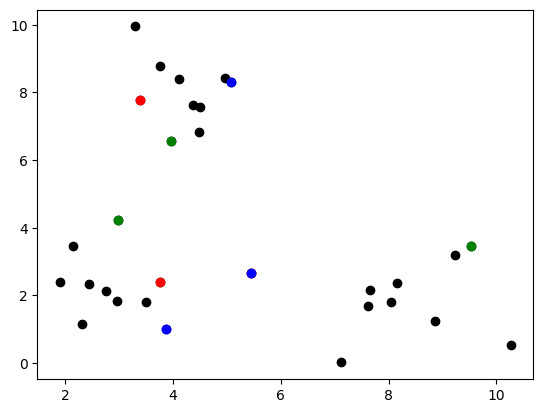

In [57]:
# Plot the samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='black', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='black', label='Class 2')
plt.scatter(class_3[:, 0], class_3[:, 1], color='black', label='Class 3')

plt.scatter(support_vectors_1[:, 0], support_vectors_1[:, 1], color='red', label='Support Vectors for SVM 1')
plt.scatter(support_vectors_2[:, 0], support_vectors_2[:, 1], color='blue', label='Support Vectors for SVM 2')
plt.scatter(support_vectors_3[:, 0], support_vectors_3[:, 1], color='green', label='Support Vectors for SVM 3')

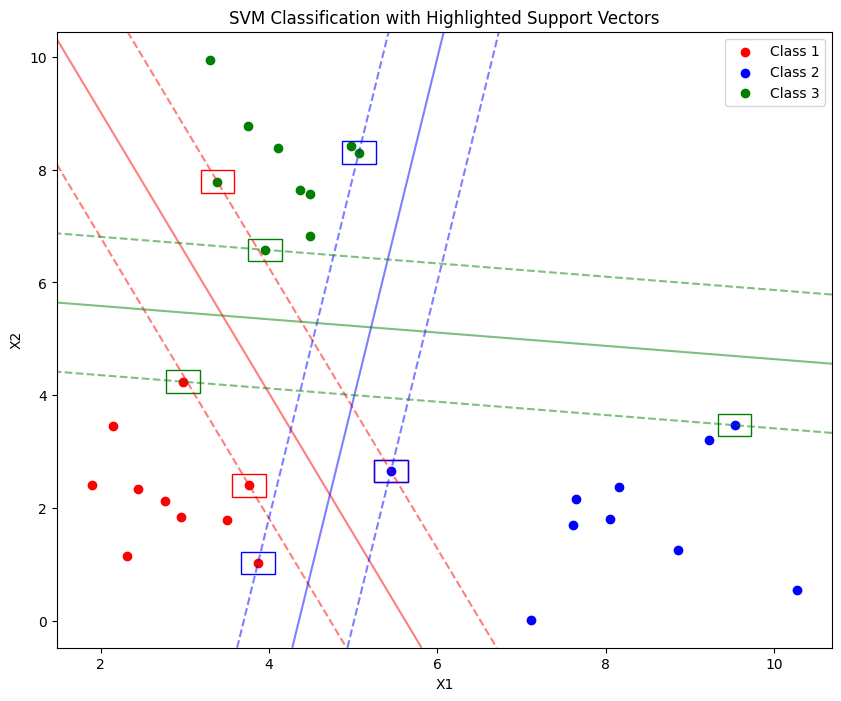

In [58]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Replotting the hyperplanes to ensure they are visible above the highlighted points
plot_hyperplane(svm1, 'red')
plot_hyperplane(svm2, 'blue')
plot_hyperplane(svm3, 'green')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig
plt.show()

In [123]:
def calculate_coefficients(support_vectors, labels):
    """
    Calculate the matrix for the equations derived from the support vectors for SVM.
    
    Parameters:
    - support_vectors: A list of support vector coordinates.
    - labels: The list of labels associated with the support vectors.
    
    Returns:
    - A matrix of coefficients for the equations.
    """

    num_vectors = len(support_vectors)
    A = np.zeros((num_vectors, num_vectors + 1))  # Initialize the matrix
    # Iterate over each support vector to construct the matrix rows
    for i in range(num_vectors):
        value_count = 0
        for j in range(num_vectors):
            dot_product = np.dot(support_vectors[i], support_vectors[j])
            # print(f"Dot product for support vector {support_vectors[i]} and {support_vectors[j]}: {dot_product}")
            # Multiply by labels and sum the products for the row
            value_count += 1
            if value_count == 3:
                # print(f"Value count: {value_count}")
                dot_product *= -1
            A[i, j] = dot_product
        
        A[i, -1] = 1  # Set the last column for the bias term

    # Add the KKT condition row to the matrix
    A_kkt = np.array(labels + [0])
    
    # Combine the A matrix with the KKT condition row
    A_full = np.vstack([A, A_kkt])

    return A_full

In [130]:
support_vectors_test = np.array([[3, 1], [3, -1], [1, 0]])
labels = [1, 1, -1]
A = calculate_coefficients(support_vectors_test, labels)
print(f"Support Vectors for SVM 1: \n{support_vectors_test}")
print(f"Matrix A for SVM 1: \n{A}")

B = np.array([1, 1, -1, 0])

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_test, labels)
print("Weight Vector:", w)
w1 = w[0]
print("w1:", w1)
w2 = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

Support Vectors for SVM 1: 
[[ 3  1]
 [ 3 -1]
 [ 1  0]]
Matrix A for SVM 1: 
[[ 10.  -8.  -3.   1.]
 [  8. -10.  -3.   1.]
 [  3.  -3.  -1.   1.]
 [  1.   1.  -1.   0.]]
Parameters: [ 1.66666667e-01 -1.66666667e-01  8.32667268e-17 -2.00000000e+00]
Bias: -2.0
Weight Vector: [2.77555756e-17 3.33333333e-01]
w1: 2.775557561562889e-17
w2: 0.33333333333333337
Classification result for point [3.951 6.58 ]: 1.0


Look at the calculations for this matrix - the negatives are all topsy turvey

the order of the support vectors is key 

then understand why the results are different polarity to my workings

In [129]:
def calculate_coefficients(support_vectors, labels):
    """
    Calculate the matrix for the equations derived from the support vectors for SVM.
    
    Parameters:
    - support_vectors: A list of support vector coordinates.
    - labels: The list of labels associated with the support vectors.
    
    Returns:
    - A matrix of coefficients for the equations.
    """

    num_vectors = len(support_vectors)
    A = np.zeros((num_vectors, num_vectors + 1))  # Initialize the matrix
    # Iterate over each support vector to construct the matrix rows
    for i in range(num_vectors):
        value_count = 0
        for j in range(num_vectors):
            dot_product = np.dot(support_vectors[i], support_vectors[j])
            # print(f"Dot product for support vector {support_vectors[i]} and {support_vectors[j]}: {dot_product}")
            # Multiply by labels and sum the products for the row
            value_count += 1
            if value_count == 2 or value_count == 3:
                # print(f"Value count: {value_count}")
                dot_product *= -1
            A[i, j] = dot_product
        
        A[i, -1] = 1  # Set the last column for the bias term

    # Add the KKT condition row to the matrix
    A_kkt = np.array(labels + [0])
    
    # Combine the A matrix with the KKT condition row
    A_full = np.vstack([A, A_kkt])

    return A_full

In [40]:
def solve_for_parameters(A, B):
    """
    Solve for the Lagrange multipliers and bias term.

    Parameters:
    - A: Coefficient matrix.
    - B: Constant terms vector.

    Returns:
    - The solution vector containing the Lagrange multipliers and the bias term.
    """
    return np.linalg.solve(A, B)

In [126]:
def calculate_weight_vector(lambda_values, support_vectors, labels):
    """
    Calculate the weight vector w.

    Parameters:
    - lambda_values: The Lagrange multipliers.
    - support_vectors: The support vectors with their labels.

    Returns:
    - The weight vector w.
    """
    w = np.sum([l * label * sv for l, label, sv in zip(lambda_values, labels, support_vectors)], axis=0)
    return w

Test

In [132]:
support_vectors_1

array([[3.764, 2.4  ],
       [5.447, 2.654],
       [3.386, 7.787]])

In [156]:
support_vectors_1
labels = [1, -1, -1]

A = calculate_coefficients(support_vectors_1, labels)
print(f"Support Vectors for SVM 1: \n{support_vectors_1}")
print(f"Matrix A for SVM 1: \n{A}")
print(f"Vector B for SVM 1: \n{B}")

B = np.array([1, -1, -1, 0])

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_1, labels)
print("Weight Vector:", w)
w1 = w[0]
print("w1:", w1)
w2 = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

Support Vectors for SVM 1: 
[[3.764 2.4  ]
 [5.447 2.654]
 [3.386 7.787]]
Matrix A for SVM 1: 
[[ 19.927696 -26.872108 -31.433704   1.      ]
 [ 26.872108 -36.713525 -39.11024    1.      ]
 [ 31.433704 -39.11024  -72.102365   1.      ]
 [  1.        -1.        -1.         0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
Parameters: [0.72891037 0.67733387 0.0515765  6.29712509]
Bias: 6.297125088118931
Weight Vector: [-1.12045698 -0.44988542]
w1: -1.1204569840454393
w2: -0.4498854167382912
Classification result for point [3.951 6.58 ]: -1.0


-w1: 1.1204569840454393
w2: -0.4498854167382912
-w1 / w2: -2.4905385735080077


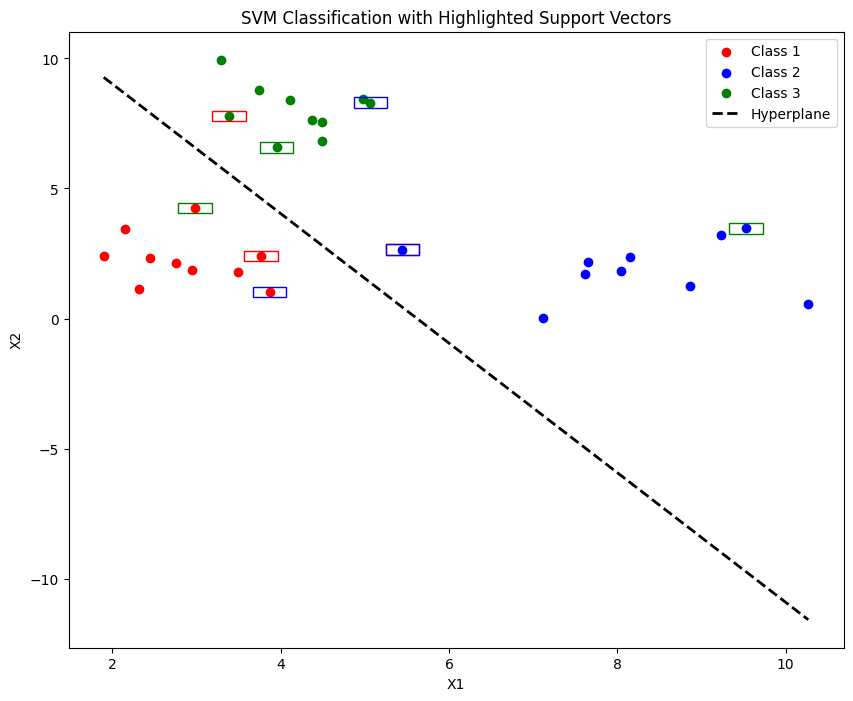

In [157]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Calculate x2 for the hyperplane across a range of x1
x1_range = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane = (-w1 / w2) * x1_range - (bias / w2)
print("-w1:", -w1)
print("w2:", w2)
print("-w1 / w2:", -w1 / w2)

# Add the hyperplane to the plot
plt.plot(x1_range, x2_hyperplane, label='Hyperplane', color='black', lw=2, ls='--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig
plt.show()

In [162]:
# Reorder

support_vectors_2 = np.array([[5.447, 2.654],
                             [5.067, 8.302],
                             [3.868, 1.023]])

In [163]:
support_vectors_2
labels = [1, -1, -1]

A = calculate_coefficients(support_vectors_2, labels)
print(f"Support Vectors for SVM 1: \n{support_vectors_2}")
print(f"Matrix A for SVM 1: \n{A}")
B = np.array([1, -1, -1, 0])
print(f"Vector B for SVM 1: \n{B}")

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_2, labels)
print("Weight Vector:", w)
w1 = w[0]
print("w1:", w1)
w2 = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

lambda_values = solution[:-1]
class_labels = [1, -1, -1]

support_vectors = [[3.764, 2.4], [5.447, 2.654], [3.386, 7.787]]

Support Vectors for SVM 1: 
[[5.447 2.654]
 [5.067 8.302]
 [3.868 1.023]]
Matrix A for SVM 1: 
[[ 36.713525 -49.633457 -23.784038   1.      ]
 [ 49.633457 -94.597693 -28.092102   1.      ]
 [ 23.784038 -28.092102 -16.007953   1.      ]
 [  1.        -1.        -1.         0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
Parameters: [ 1.19643182  0.3026235   0.89380832 -6.6466081 ]
Bias: -6.646608104951451
Weight Vector: [ 1.52632027 -0.25141613]
w1: 1.526320270179029
w2: -0.2514161291310145
Classification result for point [3.951 6.58 ]: -1.0


-w1: -0.09601876594741798
w2: 0.8151644974344217
-w1 / w2: -0.11779066219102911


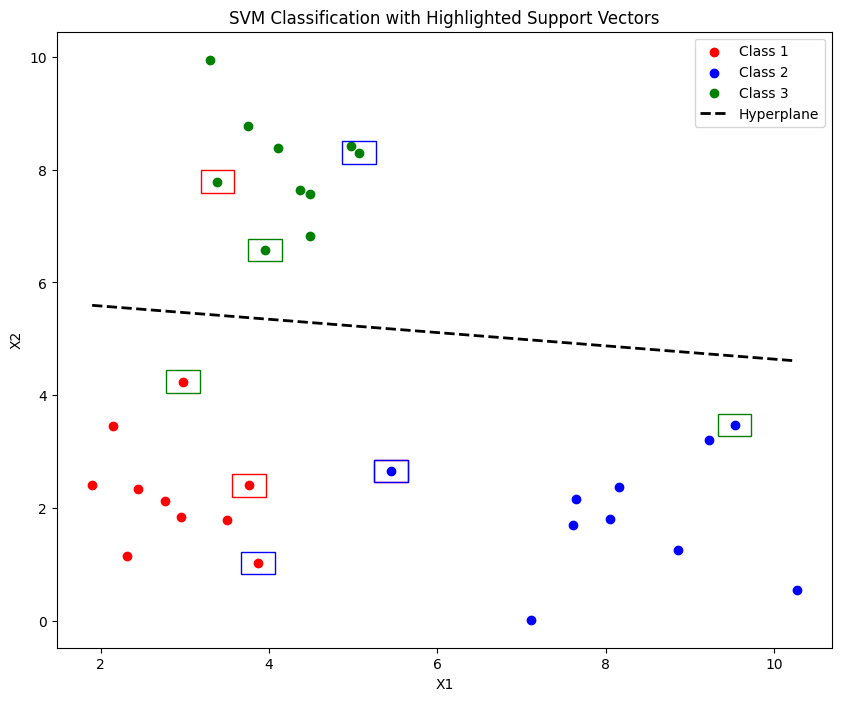

In [169]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Calculated SVM parameters

# Calculate x2 for the hyperplane across a range of x1
x1_range = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane = (-w1 / w2) * x1_range - (bias / w2)
print("-w1:", -w1)
print("w2:", w2)
print("-w1 / w2:", -w1 / w2)

# Add the hyperplane to the plot
plt.plot(x1_range, x2_hyperplane, label='Hyperplane', color='black', lw=2, ls='--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig('svm_worked_2.png')
plt.show()

In [166]:
support_vectors_3 = np.array([[3.951, 6.58 ],
                              [9.533, 3.469],
                              [2.979, 4.241]])

In [167]:
support_vectors_3
labels = [1, -1, -1]

A = calculate_coefficients(support_vectors_3, labels)
print(f"Support Vectors for SVM 1: \n{support_vectors_3}")
print(f"Matrix A for SVM 1: \n{A}")
B = np.array([1, -1, -1, 0])
print(f"Vector B for SVM 1: \n{B}")

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_3, labels)
print("Weight Vector:", w)
w1 = w[0]
print("w1:", w1)
w2 = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

Support Vectors for SVM 1: 
[[3.951 6.58 ]
 [9.533 3.469]
 [2.979 4.241]]
Matrix A for SVM 1: 
[[  58.906801  -60.490903  -39.675809    1.      ]
 [  60.490903 -102.91205   -43.110836    1.      ]
 [  39.675809  -43.110836  -26.860522    1.      ]
 [   1.         -1.         -1.          0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
Parameters: [ 0.33685638  0.03530754  0.30154884 -4.74315254]
Bias: -4.743152537376741
Weight Vector: [0.09601877 0.8151645 ]
w1: 0.09601876594741798
w2: 0.8151644974344217
Classification result for point [3.951 6.58 ]: 1.0


-w1: -0.09601876594741798
w2: 0.8151644974344217
-w1 / w2: -0.11779066219102911


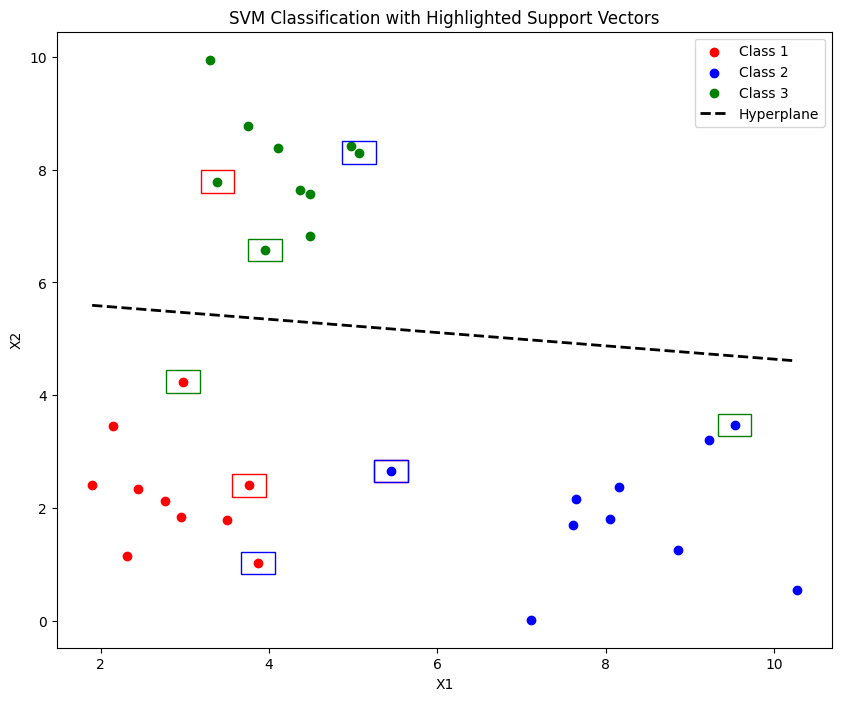

In [170]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Calculated SVM parameters

# Calculate x2 for the hyperplane across a range of x1
x1_range = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane = (-w1 / w2) * x1_range - (bias / w2)
print("-w1:", -w1)
print("w2:", w2)
print("-w1 / w2:", -w1 / w2)

# Add the hyperplane to the plot
plt.plot(x1_range, x2_hyperplane, label='Hyperplane', color='black', lw=2, ls='--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig('svm_worked_3.png')
plt.show()

In [171]:
support_vectors_1
labels = [1, -1, -1]

A = calculate_coefficients(support_vectors_1, labels)
print(f"Support Vectors for SVM 1: \n{support_vectors_1}")
print(f"Matrix A for SVM 1: \n{A}")
print(f"Vector B for SVM 1: \n{B}")

B = np.array([1, -1, -1, 0])

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias_a = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_1, labels)
print("Weight Vector:", w)
w1_a = w[0]
print("w1:", w1)
w2_a = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

Support Vectors for SVM 1: 
[[3.764 2.4  ]
 [5.447 2.654]
 [3.386 7.787]]
Matrix A for SVM 1: 
[[ 19.927696 -26.872108 -31.433704   1.      ]
 [ 26.872108 -36.713525 -39.11024    1.      ]
 [ 31.433704 -39.11024  -72.102365   1.      ]
 [  1.        -1.        -1.         0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
Parameters: [0.72891037 0.67733387 0.0515765  6.29712509]
Bias: -4.743152537376741
Weight Vector: [-1.12045698 -0.44988542]
w1: 0.09601876594741798
w2: 0.8151644974344217
Classification result for point [2.979 4.241]: -1.0


In [173]:
support_vectors_2
labels = [1, -1, -1]

A = calculate_coefficients(support_vectors_2, labels)
print(f"Support Vectors for SVM 2: \n{support_vectors_2}")
print(f"Matrix A for SVM 1: \n{A}")
B = np.array([1, -1, -1, 0])
print(f"Vector B for SVM 1: \n{B}")

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias_b = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_2, labels)
print("Weight Vector:", w)
w1_b = w[0]
print("w1:", w1)
w2_b = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

lambda_values = solution[:-1]
class_labels = [1, -1, -1]

support_vectors = [[3.764, 2.4], [5.447, 2.654], [3.386, 7.787]]

Support Vectors for SVM 1: 
[[5.447 2.654]
 [5.067 8.302]
 [3.868 1.023]]
Matrix A for SVM 1: 
[[ 36.713525 -49.633457 -23.784038   1.      ]
 [ 49.633457 -94.597693 -28.092102   1.      ]
 [ 23.784038 -28.092102 -16.007953   1.      ]
 [  1.        -1.        -1.         0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
Parameters: [ 1.19643182  0.3026235   0.89380832 -6.6466081 ]
Bias: -4.743152537376741
Weight Vector: [ 1.52632027 -0.25141613]
w1: 0.09601876594741798
w2: 0.8151644974344217
Classification result for point [2.979 4.241]: -1.0


In [176]:
support_vectors_3
labels = [1, -1, -1]

A = calculate_coefficients(support_vectors_3, labels)
print(f"Support Vectors for SVM 3: \n{support_vectors_3}")
print(f"Matrix A for SVM 1: \n{A}")
B = np.array([1, -1, -1, 0])
print(f"Vector B for SVM 1: \n{B}")

solution = solve_for_parameters(A, B)
print("Parameters:", solution)
lambda_values = solution[:-1]
bias_c = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(lambda_values, support_vectors_3, labels)
print("Weight Vector:", w)
w1_c = w[0]
print("w1:", w1)
w2_c = w[1]
print("w2:", w2)

classification_result = np.sign(np.dot(w, point) + bias)
print(f"Classification result for point {point}: {classification_result}")

Support Vectors for SVM 1: 
[[3.951 6.58 ]
 [9.533 3.469]
 [2.979 4.241]]
Matrix A for SVM 1: 
[[  58.906801  -60.490903  -39.675809    1.      ]
 [  60.490903 -102.91205   -43.110836    1.      ]
 [  39.675809  -43.110836  -26.860522    1.      ]
 [   1.         -1.         -1.          0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
Parameters: [ 0.33685638  0.03530754  0.30154884 -4.74315254]
Bias: -4.743152537376741
Weight Vector: [0.09601877 0.8151645 ]
w1: 0.09601876594741798
w2: 0.8151644974344217
Classification result for point [2.979 4.241]: -1.0


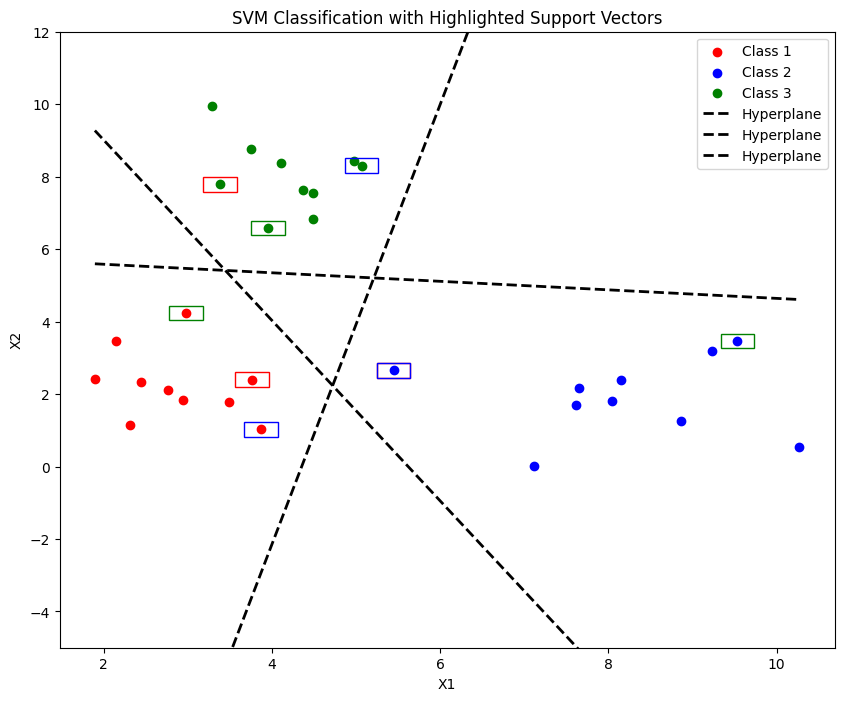

In [179]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))
plt.ylim(-5, 12)

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Calculated SVM parameters

# Calculate x2 for the hyperplane across a range of x1
x1_range_a = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_a = (-w1_a / w2_a) * x1_range_a - (bias_a / w2_a)

x1_range_b = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_b = (-w1_b / w2_b) * x1_range_b - (bias_b / w2_b)

x1_range_c = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_c = (-w1_c / w2_c) * x1_range_c - (bias_c / w2_c)

# Add the hyperplane to the plot
plt.plot(x1_range_a, x2_hyperplane_a, label='Hyperplane', color='black', lw=2, ls='--')
plt.plot(x1_range_b, x2_hyperplane_b, label='Hyperplane', color='black', lw=2, ls='--')
plt.plot(x1_range_c, x2_hyperplane_c, label='Hyperplane', color='black', lw=2, ls='--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig('svm_all.png')
plt.show()

In [86]:
A, B = calculate_coefficients(support_vectors_2)
print(f"Support Vectors for SVM 1: \n{support_vectors_2}")
print(f"Matrix A for SVM 1: \n{A}")
print(f"Vector B for SVM 1: \n{B}")

solution = solve_for_parameters(A, B)
print(solution)

w = calculate_weight_vector(solution, list(zip([1]*len(support_vectors_2), support_vectors_2)))
print("Weight Vector:", w)
bias = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(solution, list(zip([1]*len(support_vectors_2), support_vectors_2)))
print("Weight Vector:", w)
w1 = w[0]
print("w1:", w1)
w2 = w[1]
print("w2:", w2)

Support Vectors for SVM 1: 
[[3.868 1.023]
 [5.067 8.302]
 [5.447 2.654]]
Matrix A for SVM 1: 
[[ 16.007953 -28.092102 -23.784038   1.      ]
 [-28.092102  94.597693 -49.633457   1.      ]
 [-23.784038 -49.633457  36.713525   1.      ]
 [  1.        -1.        -1.         0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
[0.17317238 0.06808516 0.10508721 2.63991835]
Weight Vector: [1.58722831 1.02129982]
Bias: 2.639918348296671
Weight Vector: [1.58722831 1.02129982]
w1: 1.5872283137201135
w2: 1.0212998230883086


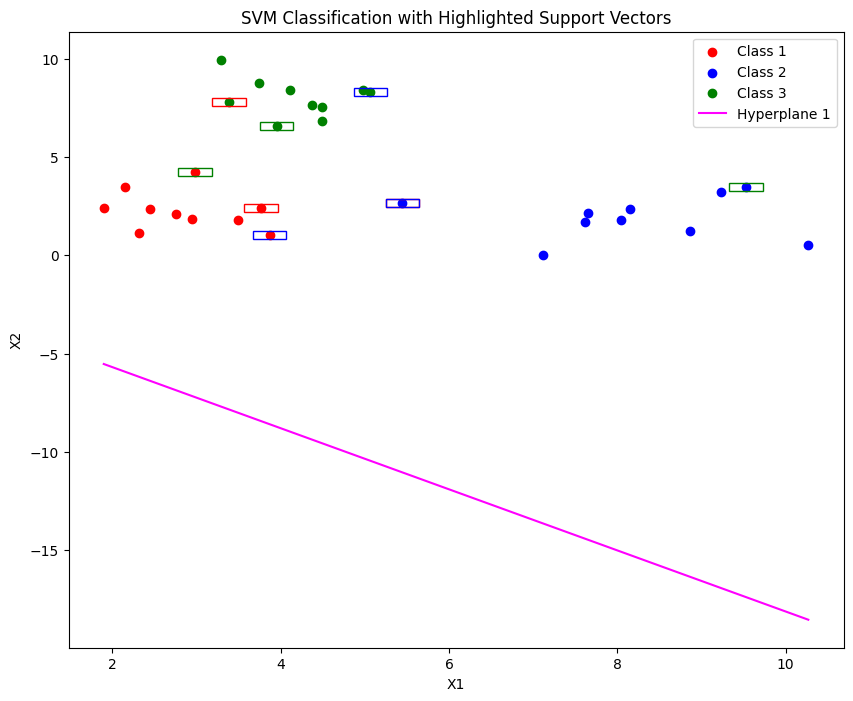

In [88]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Add hyperplane
        
x1_range = np.linspace(start=min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       stop=max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])), 
                       num=100)
# x2_hyperplane = -(1.20293022 * x1_range + 2.28669277) / 1.04902713
x2_hyperplane = (-w1 * x1_range - bias) / w2
plt.plot(x1_range, x2_hyperplane, label='Hyperplane 1', color='magenta', zorder=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig
plt.show()

In [89]:
A, B = calculate_coefficients(support_vectors_3)
print(f"Support Vectors for SVM 1: \n{support_vectors_3}")
print(f"Matrix A for SVM 1: \n{A}")
print(f"Vector B for SVM 1: \n{B}")

solution = solve_for_parameters(A, B)
print(solution)

w = calculate_weight_vector(solution, list(zip([1]*len(support_vectors_3), support_vectors_3)))
print("Weight Vector:", w)
bias = solution[-1]
print("Bias:", bias)

w = calculate_weight_vector(solution, list(zip([1]*len(support_vectors_3), support_vectors_3)))
print("Weight Vector:", w)
w1 = w[0]
print("w1:", w1)
w2 = w[1]
print("w2:", w2)

Support Vectors for SVM 1: 
[[2.979 4.241]
 [9.533 3.469]
 [3.951 6.58 ]]
Matrix A for SVM 1: 
[[ 26.860522 -43.110836 -39.675809   1.      ]
 [-43.110836 102.91205  -60.490903   1.      ]
 [-39.675809 -60.490903  58.906801   1.      ]
 [  1.        -1.        -1.         0.      ]]
Vector B for SVM 1: 
[ 1 -1 -1  0]
[0.10916197 0.04741383 0.06174814 2.5618098 ]
Weight Vector: [1.02115648 1.03373727]
Bias: 2.561809798731202
Weight Vector: [1.02115648 1.03373727]
w1: 1.0211564829927489
w2: 1.0337372652078636


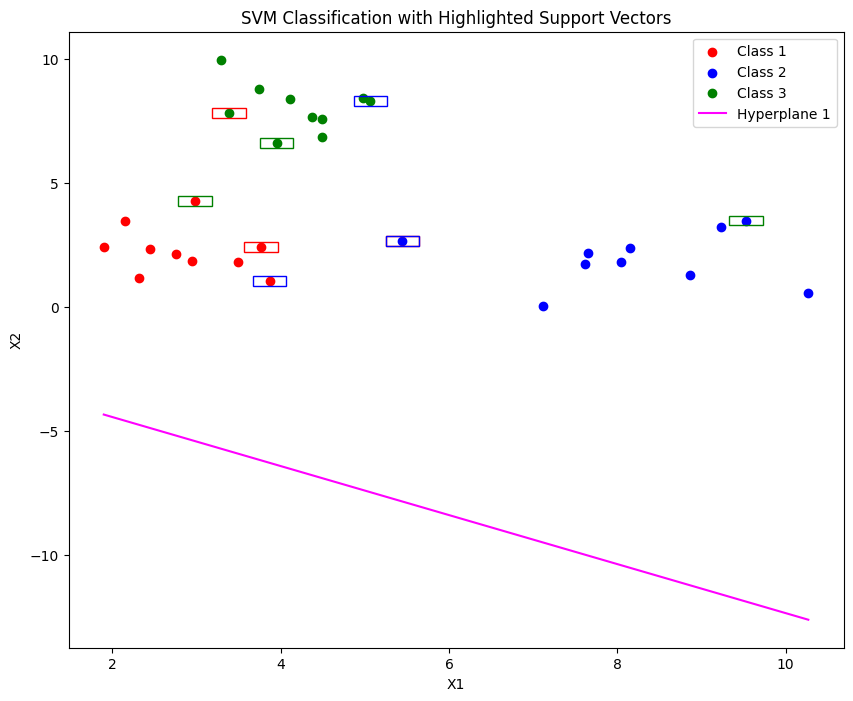

In [90]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Add hyperplane
        
x1_range = np.linspace(start=min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       stop=max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])), 
                       num=100)
# x2_hyperplane = -(1.20293022 * x1_range + 2.28669277) / 1.04902713
x2_hyperplane = (-w1 * x1_range - bias) / w2
plt.plot(x1_range, x2_hyperplane, label='Hyperplane 1', color='magenta', zorder=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig
plt.show()

Classifying Means

In [184]:
class_1 = [
    (3.764, 2.4),
    (2.979, 4.241),
    (3.868, 1.023),
    (2.95, 1.849),
    (1.897, 2.411),
    (2.144, 3.454),
    (2.761, 2.122),
    (2.444, 2.334),
    (3.494, 1.795),
    (2.313, 1.146)
]

class_2 = [
    (5.447, 2.654),
    (8.864, 1.258),
    (10.27, 0.546),
    (8.046, 1.813),
    (9.533, 3.469),
    (8.155, 2.378),
    (7.112, 0.019),
    (7.652, 2.156),
    (9.23, 3.202),
    (7.613, 1.698)
]

class_3 = [
    (3.951, 6.58),
    (3.294, 9.951),
    (4.49, 7.562),
    (3.747, 8.777),
    (3.386, 7.787),
    (4.105, 8.387),
    (4.489, 6.819),
    (4.972, 8.428),
    (5.067, 8.302),
    (4.366, 7.637)
]


In [193]:
average_points = []
for i in range(len(class_1)):
    x1_class_1 = class_1[i][0]
    y1_class_1 = class_1[i][1]
    x2_class_2 = class_2[i][0]
    y2_class_2 = class_2[i][1]
    x3_class_3 = class_3[i][0]
    y3_class_3 = class_3[i][1]

    # Make more pythonic
    

    # Average the x and y values for each class
    x_avg_class_1 = (x1_class_1 + x2_class_2 + x3_class_3) / 3
    y_avg_class_1 = (y1_class_1 + y2_class_2 + y3_class_3) / 3
    average_points.append((x_avg_class_1, y_avg_class_1))
    print(f"Average for Class {i}: ({x_avg_class_1}, {y_avg_class_1})")

print(average_points)

Average for Class 0: (4.387333333333333, 3.878)
Average for Class 1: (5.0456666666666665, 5.1499999999999995)
Average for Class 2: (6.209333333333333, 3.0436666666666667)
Average for Class 3: (4.9143333333333326, 4.146333333333334)
Average for Class 4: (4.938666666666666, 4.555666666666666)
Average for Class 5: (4.801333333333333, 4.739666666666667)
Average for Class 6: (4.787333333333334, 2.986666666666667)
Average for Class 7: (5.022666666666667, 4.306)
Average for Class 8: (5.9303333333333335, 4.433)
Average for Class 9: (4.764, 3.4936666666666665)
[(4.387333333333333, 3.878), (5.0456666666666665, 5.1499999999999995), (6.209333333333333, 3.0436666666666667), (4.9143333333333326, 4.146333333333334), (4.938666666666666, 4.555666666666666), (4.801333333333333, 4.739666666666667), (4.787333333333334, 2.986666666666667), (5.022666666666667, 4.306), (5.9303333333333335, 4.433), (4.764, 3.4936666666666665)]


In [247]:
average_points = []
for i, (class_1_point, class_2_point, class_3_point) in enumerate(zip(class_1, class_2, class_3)):
    # Unpack the x and y components directly
    x1, y1 = class_1_point
    x2, y2 = class_2_point
    x3, y3 = class_3_point

    # Compute the averages using a more concise approach
    x_avg = (x1 + x2 + x3) / 3
    y_avg = (y1 + y2 + y3) / 3

    print(f"Average for Class {i}: ({x_avg}, {y_avg})")
    average_points.append((x_avg, y_avg))
print(average_points)

# average_points.append((3.764, 2.4))
print(average_points)

Average for Class 0: (4.387333333333333, 3.878)
Average for Class 1: (5.0456666666666665, 5.1499999999999995)
Average for Class 2: (6.209333333333333, 3.0436666666666667)
Average for Class 3: (4.9143333333333326, 4.146333333333334)
Average for Class 4: (4.938666666666666, 4.555666666666666)
Average for Class 5: (4.801333333333333, 4.739666666666667)
Average for Class 6: (4.787333333333334, 2.986666666666667)
Average for Class 7: (5.022666666666667, 4.306)
Average for Class 8: (5.9303333333333335, 4.433)
Average for Class 9: (4.764, 3.4936666666666665)
[(4.387333333333333, 3.878), (5.0456666666666665, 5.1499999999999995), (6.209333333333333, 3.0436666666666667), (4.9143333333333326, 4.146333333333334), (4.938666666666666, 4.555666666666666), (4.801333333333333, 4.739666666666667), (4.787333333333334, 2.986666666666667), (5.022666666666667, 4.306), (5.9303333333333335, 4.433), (4.764, 3.4936666666666665)]
[(4.387333333333333, 3.878), (5.0456666666666665, 5.1499999999999995), (6.209333333

In [207]:
w1_svm1 = -1.12045698
w2_svm1 = -0.44988542
bias_svm1 = 6.29712509
point_class_0 = np.array([4.387333333333333, 3.878])

classification_svm1_class_0 = np.sign(w1_svm1 * point_class_0[0] + w2_svm1 * point_class_0[1] + bias_svm1)
print(f"Classification result for point {point_class_0}: {classification_svm1_class_0}")

Classification result for point [4.38733333 3.878     ]: -1.0


In [248]:
average_points = np.array(average_points)
print(average_points)

def classify_points(points, svm_params):
    all_decision_function_values = []
    for point in points:
        decision_values = [np.dot(params['Weight Vector'], point) + params['Bias'] for params in svm_params]
        all_decision_function_values.append(decision_values)
    return all_decision_function_values

svm_params_1 = [
    {'Weight Vector': [-1.12045698, -0.44988542], 'Bias': 6.29712509},
]
svm_params_2 = [
    {'Weight Vector': [-0.94878736, -0.36703998], 'Bias': 5.28712509},
]
svm_params_3 = [
    {'Weight Vector': [-1.20293022, -1.04902713], 'Bias': 2.28669277}
]

# Classify all average points for each SVM
all_decision_function_values = []
for svm_params in [svm_params_1, svm_params_2, svm_params_3]:
    decision_values = classify_points(average_points, svm_params)
    print(decision_values)
    all_decision_function_values.append(decision_values)

print("Decision function values:", all_decision_function_values)

classifications = np.argmax(all_decision_function_values, axis=0) + 1

print("Classifications:", classifications)

[[4.38733333 3.878     ]
 [5.04566667 5.15      ]
 [6.20933333 3.04366667]
 [4.91433333 4.14633333]
 [4.93866667 4.55566667]
 [4.80133333 4.73966667]
 [4.78733333 2.98666667]
 [5.02266667 4.306     ]
 [5.93033333 4.433     ]
 [4.764      3.49366667]]
[[-0.36334882568000015], [-1.6732372584199995], [-2.0294670411533335], [-1.0745489085066655], [-1.2859664602733325], [-1.2148692856333332], [-0.410533746653333], [-1.2677634534000006], [-2.34190035392], [-0.6124816583933326]]
[[-0.2989023632133332], [-1.390395563106666], [-1.7213592431533336], [-0.8974023632333328], [-1.0707312208066657], [-1.0079664463533335], [-0.3512623383733331], [-1.058791710706667], [-1.9665884485933338], [-0.5152132365000002]]
[[-7.0590902920200005], [-9.18538186288], [-8.375590850730001], [-7.97452346451], [-8.43319653841], [-8.461015113450001], [-6.605229531480001], [-8.2723355701], [-9.49742167863], [-7.10901791459]]
Decision function values: [[[-0.36334882568000015], [-1.6732372584199995], [-2.0294670411533335],

In [211]:
class_1 = np.array(class_1)
class_2 = np.array(class_2)
class_3 = np.array(class_3)

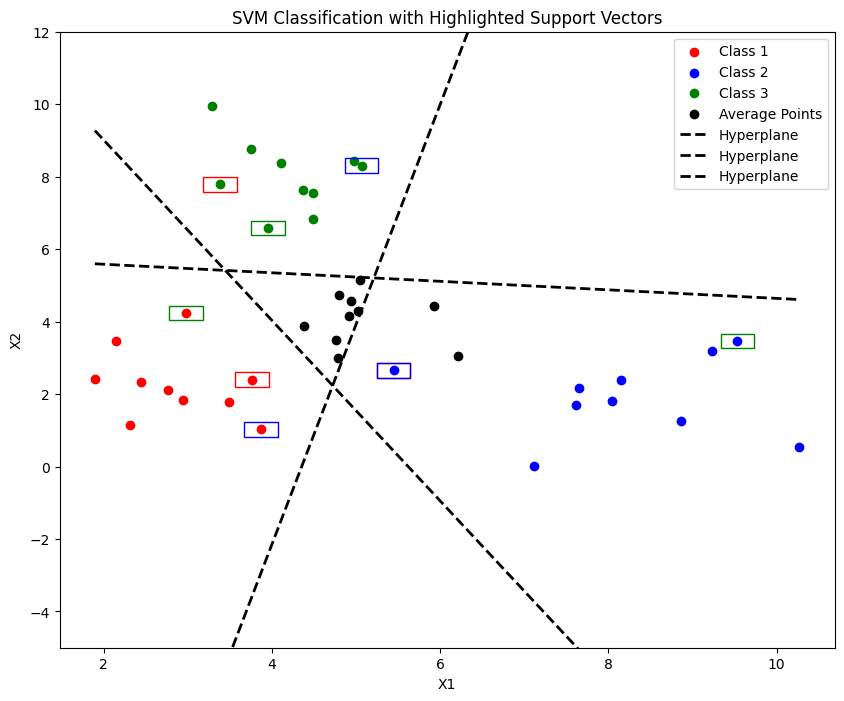

In [249]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))
plt.ylim(-5, 12)

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

# Plot all the average points
plt.scatter([point[0] for point in average_points], [point[1] for point in average_points], color='black', label='Average Points', zorder=2)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Calculated SVM parameters

# Calculate x2 for the hyperplane across a range of x1
x1_range_a = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_a = (-w1_a / w2_a) * x1_range_a - (bias_a / w2_a)

x1_range_b = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_b = (-w1_b / w2_b) * x1_range_b - (bias_b / w2_b)

x1_range_c = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_c = (-w1_c / w2_c) * x1_range_c - (bias_c / w2_c)

# Add the hyperplane to the plot
plt.plot(x1_range_a, x2_hyperplane_a, label='Hyperplane', color='black', lw=2, ls='--')
plt.plot(x1_range_b, x2_hyperplane_b, label='Hyperplane', color='black', lw=2, ls='--')
plt.plot(x1_range_c, x2_hyperplane_c, label='Hyperplane', color='black', lw=2, ls='--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig('svm_averaged.png')
plt.show()

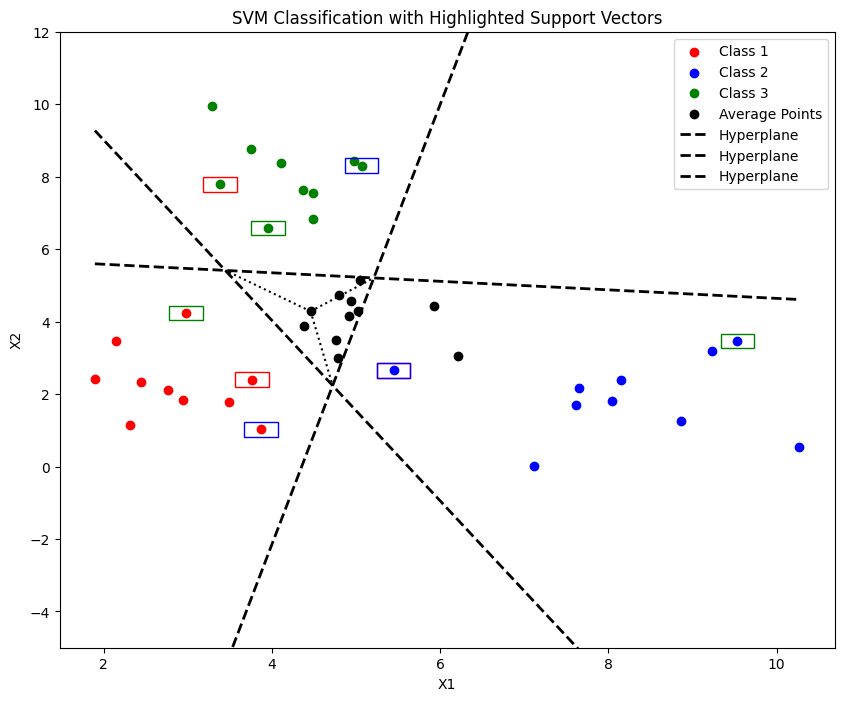

In [274]:
# Replotting the dataset with specified points highlighted
plt.figure(figsize=(10, 8))
plt.ylim(-5, 12)

# Plot all class samples
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', zorder=1)
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2', zorder=1)
plt.scatter(class_3[:, 0], class_3[:, 1], color='green', label='Class 3', zorder=1)

# Plot all the average points
plt.scatter([point[0] for point in average_points], [point[1] for point in average_points], color='black', label='Average Points', zorder=2)

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}
colors = {'svm_hyperplane_1': 'red', 'svm_hyperplane_2': 'blue', 'svm_hyperplane_3': 'green'}
offset = 0.1

for hp, points in highlight_points.items():
    for point in points:
        plt.gca().add_patch(plt.Rectangle((point[0] - 2*offset, point[1] - 2*offset),
                                          4*offset, 4*offset, fill=False, edgecolor=colors[hp], lw=1))

# Calculated SVM parameters

# Calculate x2 for the hyperplane across a range of x1
x1_range_a = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_a = (-w1_a / w2_a) * x1_range_a - (bias_a / w2_a)

x1_range_b = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_b = (-w1_b / w2_b) * x1_range_b - (bias_b / w2_b)

x1_range_c = np.linspace(min(np.min(class_1[:,0]), np.min(class_2[:,0]), np.min(class_3[:,0])),
                       max(np.max(class_1[:,0]), np.max(class_2[:,0]), np.max(class_3[:,0])),
                       num=300)
x2_hyperplane_c = (-w1_c / w2_c) * x1_range_c - (bias_c / w2_c)

# Add the hyperplane to the plot
plt.plot(x1_range_a, x2_hyperplane_a, label='Hyperplane', color='black', lw=2, ls='--')
plt.plot(x1_range_b, x2_hyperplane_b, label='Hyperplane', color='black', lw=2, ls='--')
plt.plot(x1_range_c, x2_hyperplane_c, label='Hyperplane', color='black', lw=2, ls='--')

highlight_points = {
    'svm_hyperplane_1': support_vectors_1,
    'svm_hyperplane_2': support_vectors_2,
    'svm_hyperplane_3': support_vectors_3
}

from scipy.linalg import solve

def find_intersection(params1, params2):
    # Each hyperplane equation is w * x + b = 0, rearrange to w * x = -b
    A = np.array([params1['Weight Vector'], params2['Weight Vector']])
    B = np.array([-params1['Bias'], -params2['Bias']])
    return solve(A, B)

# Calculate intersections
intersection_12 = find_intersection(svm_params[0], svm_params[1])
intersection_23 = find_intersection(svm_params[1], svm_params[2])
intersection_31 = find_intersection(svm_params[2], svm_params[0])

# Calculate the centroid of the triangle formed by the intersection points
centroid = np.mean([intersection_12, intersection_23, intersection_31], axis=0)

plt.plot(centroid[0], centroid[1], 'ko')  # Centroid
plt.plot([centroid[0], intersection_12[0]], [centroid[1], intersection_12[1]], 'k:')
plt.plot([centroid[0], intersection_23[0]], [centroid[1], intersection_23[1]], 'k:')
plt.plot([centroid[0], intersection_31[0]], [centroid[1], intersection_31[1]], 'k:')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification with Highlighted Support Vectors')
plt.legend()
plt.savefig('svm_averaged_advanced.png')
plt.show()

In [209]:
# Create a DataFrame for your table
df = pd.DataFrame(average_points, columns=['X1', 'X2'])

# Adding the SVM outputs to the DataFrame
df['Output of SVM 1'] = svm1_outputs  # Replace with actual output list from SVM 1
df['Output of SVM 2'] = svm2_outputs  # Replace with actual output list from SVM 2
df['Output of SVM 3'] = svm3_outputs  # Replace with actual output list from SVM 3


# df['Classification'] = classifications  # Replace with the list of final classifications

# Convert the DataFrame to a LaTeX formatted string
latex_table = df.to_latex(index=False, caption='Summary of classification accuracy.', label='table:svm_outputs')

print(latex_table)


\begin{table}
\caption{Summary of classification accuracy.}
\label{table:svm_outputs}
\begin{tabular}{rrrrr}
\toprule
X1 & X2 & Output of SVM 1 & Output of SVM 2 & Output of SVM 3 \\
\midrule
4.387333 & 3.878000 & -1.000000 & -1.000000 & -1.000000 \\
5.045667 & 5.150000 & -1.000000 & -1.000000 & -1.000000 \\
6.209333 & 3.043667 & -1.000000 & -1.000000 & -1.000000 \\
4.914333 & 4.146333 & -1.000000 & -1.000000 & -1.000000 \\
4.938667 & 4.555667 & -1.000000 & -1.000000 & -1.000000 \\
4.801333 & 4.739667 & -1.000000 & -1.000000 & -1.000000 \\
4.787333 & 2.986667 & -1.000000 & -1.000000 & -1.000000 \\
5.022667 & 4.306000 & -1.000000 & -1.000000 & -1.000000 \\
5.930333 & 4.433000 & -1.000000 & -1.000000 & -1.000000 \\
4.764000 & 3.493667 & -1.000000 & -1.000000 & -1.000000 \\
3.764000 & 2.400000 & 1.000000 & 1.000000 & -1.000000 \\
\bottomrule
\end{tabular}
\end{table}



In [221]:
svm_outputs = np.array([[2], [2], [2], [2], [2], [2], [2], [2], [2], [2]])

In [252]:
points = [
    (4.387333333333333, 3.878), 
     (5.0456666666666665, 5.1499999999999995), 
     (6.209333333333333, 3.0436666666666667), 
     (4.9143333333333326, 4.146333333333334), 
     (4.938666666666666, 4.555666666666666), 
     (4.801333333333333, 4.739666666666667), 
     (4.787333333333334, 2.986666666666667), 
     (5.022666666666667, 4.306), 
     (5.9303333333333335, 4.433), 
     (4.764, 3.4936666666666665)
]

In [ ]:
class_1 = [
    (3.764, 2.4),
    (2.979, 4.241),
    (3.868, 1.023),
    (2.95, 1.849),
    (1.897, 2.411),
    (2.144, 3.454),
    (2.761, 2.122),
    (2.444, 2.334),
    (3.494, 1.795),
    (2.313, 1.146)
]

class_2 = [
    (5.447, 2.654),
    (8.864, 1.258),
    (10.27, 0.546),
    (8.046, 1.813),
    (9.533, 3.469),
    (8.155, 2.378),
    (7.112, 0.019),
    (7.652, 2.156),
    (9.23, 3.202),
    (7.613, 1.698)
]

class_3 = [
    (3.951, 6.58),
    (3.294, 9.951),
    (4.49, 7.562),
    (3.747, 8.777),
    (3.386, 7.787),
    (4.105, 8.387),
    (4.489, 6.819),
    (4.972, 8.428),
    (5.067, 8.302),
    (4.366, 7.637)
]

In [255]:
# SVM Parameters for each classifier
svm_params = [
    {'Weight Vector': [-1.12045698, -0.44988542], 'Bias': 6.297125088118931},
    {'Weight Vector': [1.52632027, -0.25141613], 'Bias': -6.646608104951451},
    {'Weight Vector': [0.09601877, 0.8151645], 'Bias': -4.743152537376741},
]

In [244]:
for point in points:
    for i, params in enumerate(svm_params):
        classification = np.sign(np.dot(params['Weight Vector'], point) + params['Bias'])
        print(f"Classification result for SVM {i + 1}, point {point}: {classification}")

Classification result for SVM 1, point (4.387333333333333, 3.878): -1.0
Classification result for SVM 2, point (4.387333333333333, 3.878): -1.0
Classification result for SVM 3, point (4.387333333333333, 3.878): -1.0
Classification result for SVM 1, point (5.0456666666666665, 5.1499999999999995): -1.0
Classification result for SVM 2, point (5.0456666666666665, 5.1499999999999995): -1.0
Classification result for SVM 3, point (5.0456666666666665, 5.1499999999999995): -1.0
Classification result for SVM 1, point (6.209333333333333, 3.0436666666666667): -1.0
Classification result for SVM 2, point (6.209333333333333, 3.0436666666666667): 1.0
Classification result for SVM 3, point (6.209333333333333, 3.0436666666666667): -1.0
Classification result for SVM 1, point (4.9143333333333326, 4.146333333333334): -1.0
Classification result for SVM 2, point (4.9143333333333326, 4.146333333333334): -1.0
Classification result for SVM 3, point (4.9143333333333326, 4.146333333333334): -1.0
Classification re

In [266]:
def distance_to_hyperplane(point, weight, bias):
    norm_w = np.linalg.norm(weight)
    distance = np.abs(np.dot(weight, point) + bias) / norm_w
    return distance

# Initialize a list to hold the classification results
final_classifications = [None] * len(points)

for i, point in enumerate(points):
    distances = []
    already_classified = False

    for params in svm_params:
        classification = np.sign(np.dot(params['Weight Vector'], point) + params['Bias'])
        if classification > 0:
            already_classified = True
            final_classifications[i] = svm_params.index(params) + 1  # Classify as the current SVM's class
            break
        else: 
            distances.append(distance_to_hyperplane(point, params['Weight Vector'], params['Bias']))

    if not already_classified:
        # Find the hyperplane with the minimum distance
        closest_svm_index = np.argmin(distances)
        final_classifications[i] = closest_svm_index + 1  # Classify as the SVM closest to the point

# Print the final classifications
for point, classification in zip(points, final_classifications):
    print(f"Point {point} is classified as Class {classification}")

Point (4.387333333333333, 3.878) is classified as Class 1
Point (5.0456666666666665, 5.1499999999999995) is classified as Class 3
Point (6.209333333333333, 3.0436666666666667) is classified as Class 2
Point (4.9143333333333326, 4.146333333333334) is classified as Class 2
Point (4.938666666666666, 4.555666666666666) is classified as Class 2
Point (4.801333333333333, 4.739666666666667) is classified as Class 2
Point (4.787333333333334, 2.986666666666667) is classified as Class 2
Point (5.022666666666667, 4.306) is classified as Class 2
Point (5.9303333333333335, 4.433) is classified as Class 2
Point (4.764, 3.4936666666666665) is classified as Class 2


In [ ]:
Point (4.764, 3.4936666666666665) is classified as SVM 2, with distance 0.1639306985685759
Point (4.387333333333333, 3.878) is classified as Class 1
Point (5.0456666666666665, 5.1499999999999995) is classified as Class 3
Point (6.209333333333333, 3.0436666666666667) is classified as Class 2
Point (4.9143333333333326, 4.146333333333334) is classified as Class 2
Point (4.938666666666666, 4.555666666666666) is classified as Class 2
Point (4.801333333333333, 4.739666666666667) is classified as Class 2
Point (4.787333333333334, 2.986666666666667) is classified as Class 2
Point (5.022666666666667, 4.306) is classified as Class 2
Point (5.9303333333333335, 4.433) is classified as Class 2
Point (4.764, 3.4936666666666665) is classified as Class 2

In [225]:
def decision_function(point, weight, bias):
    return np.dot(weight, point) + bias

def classify(point, svm_params):
    # This will store the decision function value for each SVM
    decision_values = []
    for params in svm_params:
        w = params['Weight Vector']
        b = params['Bias']
        decision_values.append(decision_function(point, w, b))
    # The classification is based on which SVM gives the maximum decision function value
    classification = np.argmax(decision_values) + 1  # +1 because classes are 1-indexed
    return classification, decision_values

classifications = [classify(point, svm_params) for point in points]

# To display the results
for point, (class_label, decision_values) in zip(points, classifications):
    print(f"Point {point} is classified as Class {class_label} with decision values {decision_values}")

ValueError: shapes (2,) and (10,2) not aligned: 2 (dim 0) != 10 (dim 0)

In [245]:
points = [
    (4.39, 3.88), (5.05, 5.15), (6.21, 3.04), (4.91, 4.15),
    (4.94, 4.56), (4.80, 4.74), (4.79, 2.99), (5.02, 4.31),
    (5.93, 4.43), (4.76, 3.49)
]

svm_outputs = [
    [-1, -1, -1], [-1, -1, -1], [-1, 1, -1], [-1, -1, -1],
    [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1],
    [-1, 1, -1], [-1, -1, -1]
]

# Classification results - placeholder
classifications = ['Class 1', 'Class 2', 'Class 1', 'Class 1',
                   'Class 1', 'Class 1', 'Class 1', 'Class 1',
                   'Class 2', 'Class 1']

# Creating a DataFrame
df = pd.DataFrame(svm_outputs, columns=['Output of SVM 1', 'Output of SVM 2', 'Output of SVM 3'])
df['Test Sample'] = [f'({x[0]}, {x[1]})' for x in points]
df['Classification'] = classifications

# Rearrange columns to match the desired order
df = df[['Test Sample', 'Output of SVM 1', 'Output of SVM 2', 'Output of SVM 3', 'Classification']]

# Convert the DataFrame to a LaTeX formatted string
latex_table = df.to_latex(index=False, caption='Summary of classification accuracy.', label='table:svm_outputs')

print(latex_table)

\begin{table}
\caption{Summary of classification accuracy.}
\label{table:svm_outputs}
\begin{tabular}{lrrrl}
\toprule
Test Sample & Output of SVM 1 & Output of SVM 2 & Output of SVM 3 & Classification \\
\midrule
(4.39, 3.88) & -1 & -1 & -1 & Class 1 \\
(5.05, 5.15) & -1 & -1 & -1 & Class 2 \\
(6.21, 3.04) & -1 & 1 & -1 & Class 1 \\
(4.91, 4.15) & -1 & -1 & -1 & Class 1 \\
(4.94, 4.56) & -1 & -1 & -1 & Class 1 \\
(4.8, 4.74) & -1 & -1 & -1 & Class 1 \\
(4.79, 2.99) & -1 & -1 & -1 & Class 1 \\
(5.02, 4.31) & -1 & -1 & -1 & Class 1 \\
(5.93, 4.43) & -1 & 1 & -1 & Class 2 \\
(4.76, 3.49) & -1 & -1 & -1 & Class 1 \\
\bottomrule
\end{tabular}
\end{table}



In [250]:
column_format = '|l|c|c|c|l|'

# Convert the DataFrame to a LaTeX formatted string
latex_table = df.to_latex(index=False, caption='Summary of classification accuracy.', label='table:svm_outputs', column_format=column_format)

# Manually replace the tabular environment to use tabularx and specify the width of each column
latex_table = latex_table.replace(r'\begin{tabular}{', r'\begin{tabularx}{\textwidth}{')
latex_table = latex_table.replace(r'\end{tabular}', r'\end{tabularx}')

# Print the LaTeX table code
print(latex_table)

\begin{table}
\caption{Summary of classification accuracy.}
\label{table:svm_outputs}
\begin{tabularx}{\textwidth}{|l|c|c|c|l|}
\toprule
Test Sample & Output of SVM 1 & Output of SVM 2 & Output of SVM 3 & Classification \\
\midrule
(4.39, 3.88) & -1 & -1 & -1 & Class 1 \\
(5.05, 5.15) & -1 & -1 & -1 & Class 2 \\
(6.21, 3.04) & -1 & 1 & -1 & Class 1 \\
(4.91, 4.15) & -1 & -1 & -1 & Class 1 \\
(4.94, 4.56) & -1 & -1 & -1 & Class 1 \\
(4.8, 4.74) & -1 & -1 & -1 & Class 1 \\
(4.79, 2.99) & -1 & -1 & -1 & Class 1 \\
(5.02, 4.31) & -1 & -1 & -1 & Class 1 \\
(5.93, 4.43) & -1 & 1 & -1 & Class 2 \\
(4.76, 3.49) & -1 & -1 & -1 & Class 1 \\
\bottomrule
\end{tabularx}
\end{table}

